In [47]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import export_text

In [7]:
# Ruta a los datasets descargados localmente
path_vehicle_dataset = "C:/Users/d.medina.mosquera/Downloads/Anexo 2 - Dataset Vehicle/car data.csv"
path_heart_disease = "C:/Users/d.medina.mosquera/Downloads/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv"
path_red_wine = "C:/Users/d.medina.mosquera/Downloads/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv"



In [9]:
# Cargar los archivos
vehicle_data = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/Anexo 2 - Dataset Vehicle/car data.csv')
heart_disease_data = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv')
red_wine_data = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv')

In [11]:
# Mostrar informacion basica de cada dataset
print("Vehicle Data Summary:")
print(vehicle_data.info())
print(vehicle_data.head())

print("\nHeart Disease Data Summary:")
print(heart_disease_data.info())
print(heart_disease_data.head())

print("\nRed Wine Quality Data Summary:")
print(red_wine_data.info())
print(red_wine_data.head())

Vehicle Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85   

In [13]:
# Regresion Lineal Vehicle dataset
# Selección de características
X = vehicle_data[['Year', 'Kms_Driven', 'Owner', 'Present_Price', 'Selling_Price']]
y = vehicle_data['Selling_Price']

# División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred = linear_model.predict(X_test)

# Evaluación del modelo
y_pred = linear_model.predict(X_test)
print("Coeficientes:", linear_model.coef_)
print("Intercepto:", linear_model.intercept_)

# Visualización de resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Valores Reales vs. Predicciones")
plt.show()

Regresión Lineal:
R2 Score: 1.0
MSE: 1.2169806084521564e-29


In [15]:
#Regresion Ligistica (Heart Disease Dataset)

# Selección de características y target
X = heart_data.drop(columns=['target'])  # 'target' es la variable objetivo
y = heart_data['target']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluación
y_pred = logistic_model.predict(X_test)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


Árbol de Decisión:
Accuracy: 0.559375


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


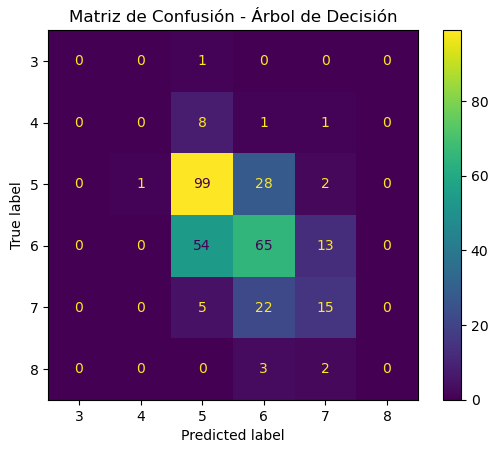

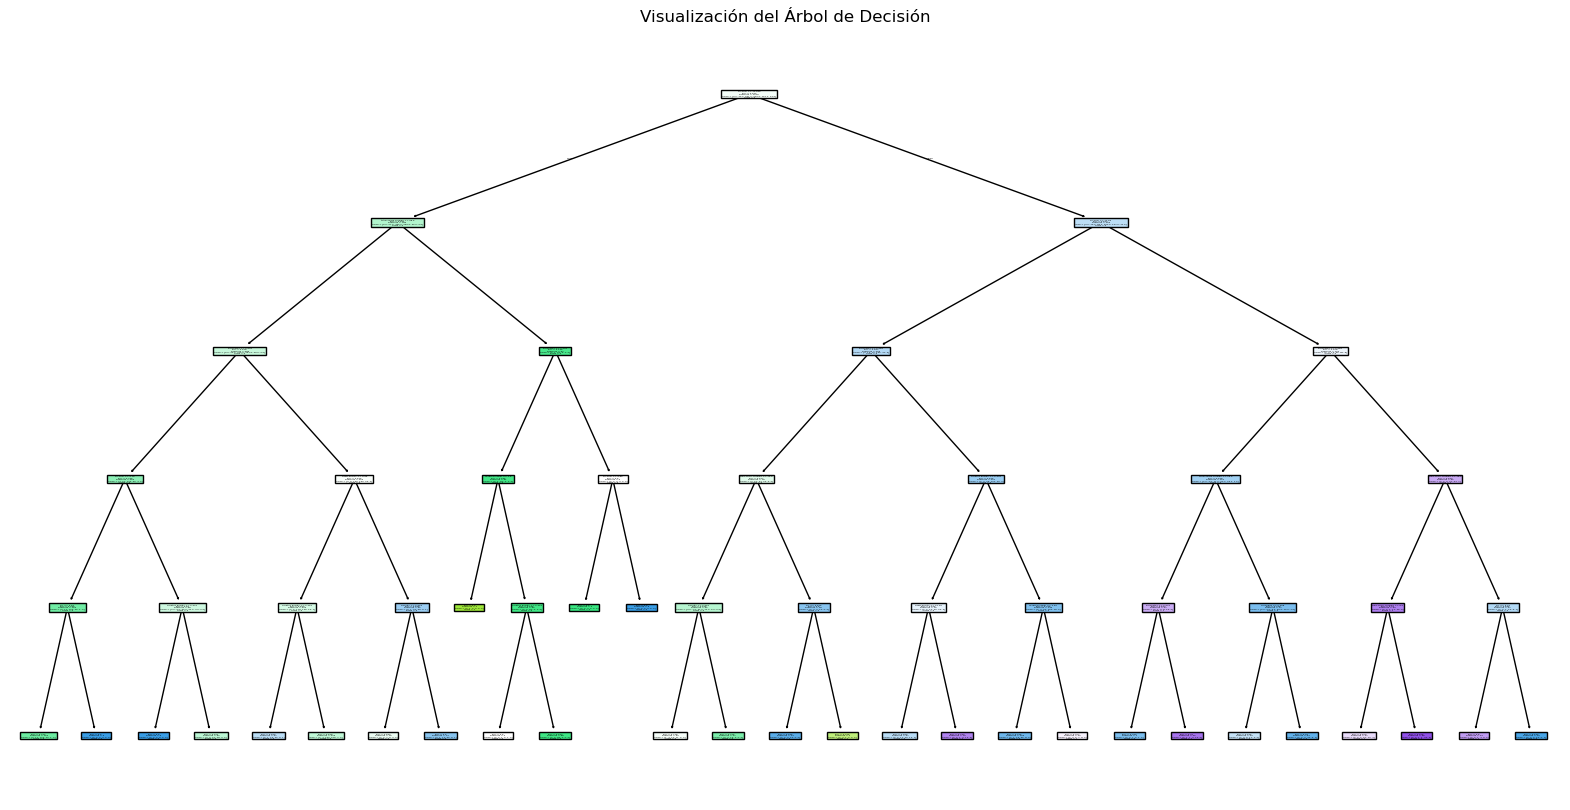

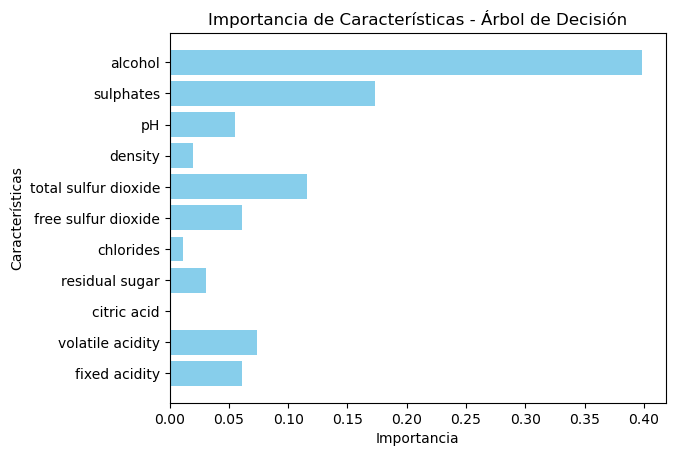

In [49]:
# Arbol de Decision (Red Wine Quality)
# Cargar el dataset (ajusta la ruta según sea necesario)
wine_data = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv')

# Mostrar las primeras filas del dataset
print(wine_data.head())

# Análisis de valores faltantes
print("\nValores faltantes:\n", wine_data.isnull().sum())

# Separación de características (X) y variable objetivo (y)
X = wine_data.drop(columns=['quality'])  # Todas las columnas excepto 'quality'
y = wine_data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Predicción en los datos de prueba
y_pred = tree_model.predict(X_test)

# Evaluación del modelo
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Visualización de la Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

# Importancia de las características
importances = tree_model.feature_importances_
features = X.columns

# Gráfico de barras para las características más importantes
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Árbol de Decisión")
plt.show()